<a href="https://colab.research.google.com/github/jairo-nlp/valuation/blob/master/Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from datetime import date


start = date(2019, 1, 1)
end = date(2020, 7, 30)

tickers = {
    'bancos': ['ITSA4.SA', 'BBDC4.SA', 'BBAS3.SA', 'SANB4.SA'],
    'industrial': ['WEGE3.SA', 'TUPY3.SA', 'MYPK3.SA', 'SHUL4.SA'],
    'varejo': ['VVAR3.SA', 'BTOW3.SA', 'MGLU3.SA'],
    'imobiliário': ['TRIS3.SA', 'ALSO3.SA', 'MRVE3.SA', 'EZTC3.SA', 'TCSA3.SA'],
    'saúde': ['AALR3.SA', 'FLRY3.SA', 'QUAL3.SA']
    }

data_source = 'yahoo'

In [171]:
def obtem_dados_setor(setor):
  """Retorna df com dados das ações do setor informado
  """

  stock_data = DataReader(tickers[setor], data_source, start, end)
  return stock_data

In [172]:
def normalizado(df):
  """Normalize data for the "start all at 1" effect.

  Will create a new column multiindexed on df

  Para integrar ao dataframe original, use o append.

  Ex: df.append(normalizado(df))

  :param df: dataframe de entrada com n ativos em multiindex
  :return df_norm: dataframe de saída, com a coluna normalizada mantendo 
    o índice dos ativos, porém utilizando 'Norm Close' para o nível mais acima.
  """
  tickers = df.columns.levels[1]
  names = df.columns.names
  idx = df.index
  cols = pd.MultiIndex.from_product([['Norm Close'], tickers], names=names)

  return pd.DataFrame((df['Adj Close'] / (df['Adj Close'].iloc[0])).values, columns=cols, index=idx)

In [198]:
def plot(df, setor=''):
  fig, ax = plt.subplots(figsize=(12, 6))
  df.plot(ax=ax)
  plt.xlabel('Tempo')
  plt.ylabel('Cotação')

  # Para incluir no título do gráfico
  data_ini = df.index[0].strftime('%m/%Y')
  data_fim = df.index[-1].strftime('%m/%Y')

  tickers = df.columns.levels[1].tolist()
  tickers = [el.split('.')[0] for el in tickers]  # retira o .SA
  plt.legend(tickers)

  plt.title(f'Cotação Relativa {setor.capitalize()} - ({data_ini} - {data_fim})')
  plt.show()

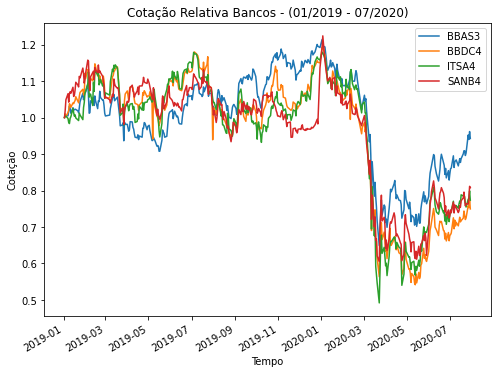

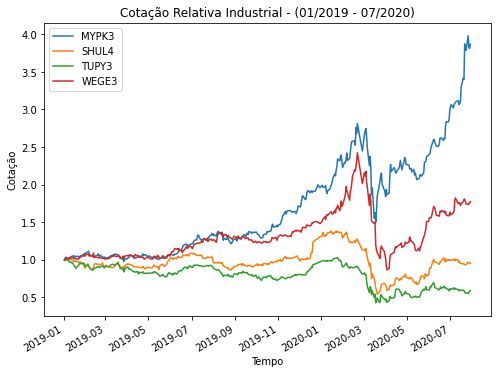

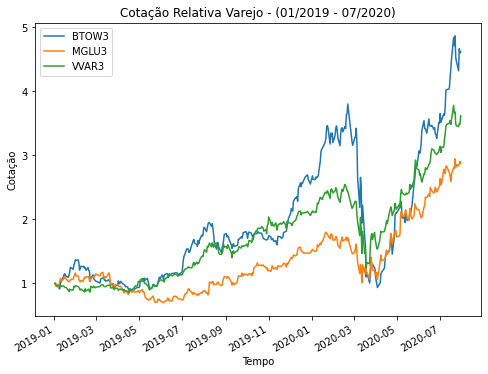

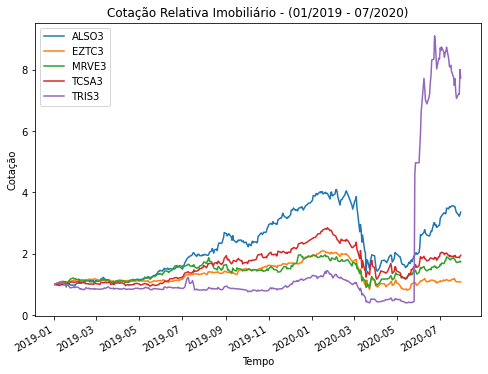

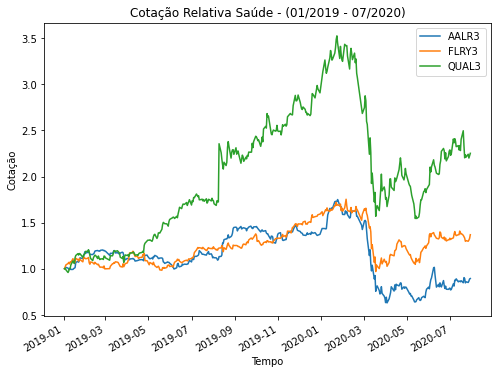

In [197]:
setores = ['bancos', 'industrial', 'varejo', 'imobiliário', 'saúde']
dados = {}

for setor in setores:
  dados[setor] = obtem_dados_setor(setor=setor)
  plot(normalizado(dados[setor]), setor=setor)